# Exploratory Data Analysis - (EDA)

## Data Loading

In [2]:
# Imported Libraries 
import pandas as pd # pandas library 
import numpy as np # numpy library
import matplotlib.pyplot as plt # Import the pyplot (pythonplot) part of the matlotlib library
import seaborn as sns # seaborn library

In [3]:
### Global Perameters
# Show all dataframe columns
pd.set_option('display.max_columns', None)
# Set matplotlib global settings
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [4]:
### Helper Functions
# checks the data for everything stated below
def dq_checks(df):
    print("+----------DataFrame Quality Report----------+")
    n_rows, n_cols=df.shape
    n_nulls = df.isna().sum().sum() # 2 sums - total null values for all columns
    n_row_dups = df.duplicated().sum()
    n_col_dups = df.T.duplicated().sum() # transpost the column for a duplicated column
    return (
    f"""
    No. of rows: {n_rows}
    No. of columns: {n_cols}
    No. of missing values: {n_nulls}
    No. of duplicated rows: {n_row_dups}
    No. of duplicated columns: {n_col_dups}
    """
)

In [5]:
## Data Loading
# Data loading for github only

CLN_DATA_PATH='../data/heart_2022_with_nans.csv'

try:
    heart_attack_raw = pd.read_csv(CLN_DATA_PATH)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


---

## Basic EDA

In [6]:
print("First 5 Rows of Data:\n")
display(heart_attack_raw.head())
print("\n\n")
print("Last 5 Rows of Data:")
display(heart_attack_raw.tail())

First 5 Rows of Data:



,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No





Last 5 Rows of Data:


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Former smoker,Not at all (right now),Yes,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [7]:
heart_attack_raw.shape

(445132, 40)

In [8]:
heart_attack_raw.index

RangeIndex(start=0, stop=445132, step=1)

In [9]:
heart_attack_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [10]:
heart_attack_raw.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [11]:
print(heart_attack_raw.columns.tolist())

['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [12]:
heart_attack_raw.head(0)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos


In [13]:
for column in heart_attack_raw:
    print(heart_attack_raw[column].value_counts())

State
Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Alaska                   5865
Okla

**Checking for Duplicates and Null Values**

In [14]:
print(dq_checks(heart_attack_raw))

+----------DataFrame Quality Report----------+

    No. of rows: 445132
    No. of columns: 40
    No. of missing values: 902665
    No. of duplicated rows: 157
    No. of duplicated columns: 0
    


Duplicates

In [15]:
# How many duplicated rows are in the dataset
heart_attack_raw.duplicated().value_counts()

False    444975
True        157
Name: count, dtype: int64

In [16]:
print(f"Amount of Duplicate Rows in the Dataset: {heart_attack_raw.duplicated().sum()}")

Amount of Duplicate Rows in the Dataset: 157


In [17]:
print(f"Duplicate Percentage of the Dataset: {(heart_attack_raw.duplicated().sum() / (len(heart_attack_raw)) * 100).round(2)}%")

Duplicate Percentage of the Dataset: 0.04%


Null Values

In [18]:
print(f"Total Amount of Null Cells in the Dataset: {heart_attack_raw.isna().sum().sum()}")

Total Amount of Null Cells in the Dataset: 902665


In [19]:
print(f"\033[1mThe Amount of Null Cells in each Column:\033[0m\n\n\
{heart_attack_raw.isna().sum().sort_values(ascending=False)}")

The Amount of Null Cells in each Column:

TetanusLast10Tdap            82516
PneumoVaxEver                77040
HIVTesting                   66127
ChestScan                    56046
CovidPos                     50764
HighRiskLastYear             50623
BMI                          48806
FluVaxLast12                 47121
AlcoholDrinkers              46574
WeightInKilograms            42078
ECigaretteUsage              35660
SmokerStatus                 35462
HeightInMeters               28652
DifficultyErrands            25656
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
BlindOrVisionDifficulty      21564
DeafOrHardOfHearing          20647
RaceEthnicityCategory        14057
RemovedTeeth                 11360
PhysicalHealthDays           10927
AgeCategory                   9079
MentalHealthDays              9067
LastCheckupTime               8308
SleepHours                    5453
HadAngina                     4405
HadSkinCancer

In [20]:
print("\033[1mHeart Attack Raw - Null Percentage & Row Significance\033[0m\n")

for column in heart_attack_raw:

    null_percentage = ((heart_attack_raw[column].isna().sum() / (len(heart_attack_raw))) * 100).round(2)
    
    
    if null_percentage > 5:
        print(f"{column}: {null_percentage}% - Significant \n")

    else:
        print(f"{column}: {null_percentage}% - Not Significant\n")

Heart Attack Raw - Null Percentage & Row Significance

State: 0.0% - Not Significant

Sex: 0.0% - Not Significant

GeneralHealth: 0.27% - Not Significant

PhysicalHealthDays: 2.45% - Not Significant

MentalHealthDays: 2.04% - Not Significant

LastCheckupTime: 1.87% - Not Significant

PhysicalActivities: 0.25% - Not Significant

SleepHours: 1.23% - Not Significant

RemovedTeeth: 2.55% - Not Significant

HadHeartAttack: 0.69% - Not Significant

HadAngina: 0.99% - Not Significant

HadStroke: 0.35% - Not Significant

HadAsthma: 0.4% - Not Significant

HadSkinCancer: 0.71% - Not Significant

HadCOPD: 0.5% - Not Significant

HadDepressiveDisorder: 0.63% - Not Significant

HadKidneyDisease: 0.43% - Not Significant

HadArthritis: 0.59% - Not Significant

HadDiabetes: 0.24% - Not Significant

DeafOrHardOfHearing: 4.64% - Not Significant

BlindOrVisionDifficulty: 4.84% - Not Significant

DifficultyConcentrating: 5.45% - Significant 

DifficultyWalking: 5.39% - Significant 

DifficultyDressingBat

**Analysis into each Column**

Copying the Original Dataframe

In [21]:
print("\033[1mCopying the Original Dataframe:\033[0m\n")

try:
    heart_attack_raw_copy_plot = heart_attack_raw.copy()
    print("Data copied successfully.")
except:
    print("ERROR: The data has NOT been copied.")

Copying the Original Dataframe:

Data copied successfully.


In [22]:
# Checking the copied data is loaded correctly
heart_attack_raw_copy_plot.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [23]:
heart_attack_raw_copy_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [24]:
print(f"Columns in the dataset that contain floats:\n\n {heart_attack_raw_copy_plot.select_dtypes(include=[float]).columns}")

Columns in the dataset that contain floats:

 Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


Changing the data type to plot the frequencies of each column to check for any bias

In [25]:
heart_attack_raw_copy_plot = heart_attack_raw_copy_plot.astype({"PhysicalHealthDays": object,
                                                                "MentalHealthDays": object,
                                                                "SleepHours": object, 
                                                                "HeightInMeters": object,
                                                                "WeightInKilograms": object, 
                                                                "BMI": object})

Checking the dataframe types have been changed

In [26]:
heart_attack_raw_copy_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State                      445132 non-null  object
 1   Sex                        445132 non-null  object
 2   GeneralHealth              443934 non-null  object
 3   PhysicalHealthDays         434205 non-null  object
 4   MentalHealthDays           436065 non-null  object
 5   LastCheckupTime            436824 non-null  object
 6   PhysicalActivities         444039 non-null  object
 7   SleepHours                 439679 non-null  object
 8   RemovedTeeth               433772 non-null  object
 9   HadHeartAttack             442067 non-null  object
 10  HadAngina                  440727 non-null  object
 11  HadStroke                  443575 non-null  object
 12  HadAsthma                  443359 non-null  object
 13  HadSkinCancer              441989 non-null  

In [27]:
heart_attack_raw_copy_plot.head(1)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [28]:
heart_attack_raw_copy_plot.nunique().sort_values(ascending=False)

BMI                          3985
WeightInKilograms             599
HeightInMeters                109
State                          54
PhysicalHealthDays             31
MentalHealthDays               31
SleepHours                     24
AgeCategory                    13
GeneralHealth                   5
RaceEthnicityCategory           5
HadDiabetes                     4
LastCheckupTime                 4
TetanusLast10Tdap               4
RemovedTeeth                    4
ECigaretteUsage                 4
SmokerStatus                    4
CovidPos                        3
HadArthritis                    2
HadAsthma                       2
HighRiskLastYear                2
PhysicalActivities              2
PneumoVaxEver                   2
FluVaxLast12                    2
HIVTesting                      2
AlcoholDrinkers                 2
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadSkinCancer                   2
HadKidneyDisea

Plotting

Histogram Column Analysis


TypeError: 'value' must be an instance of str or bytes, not a float

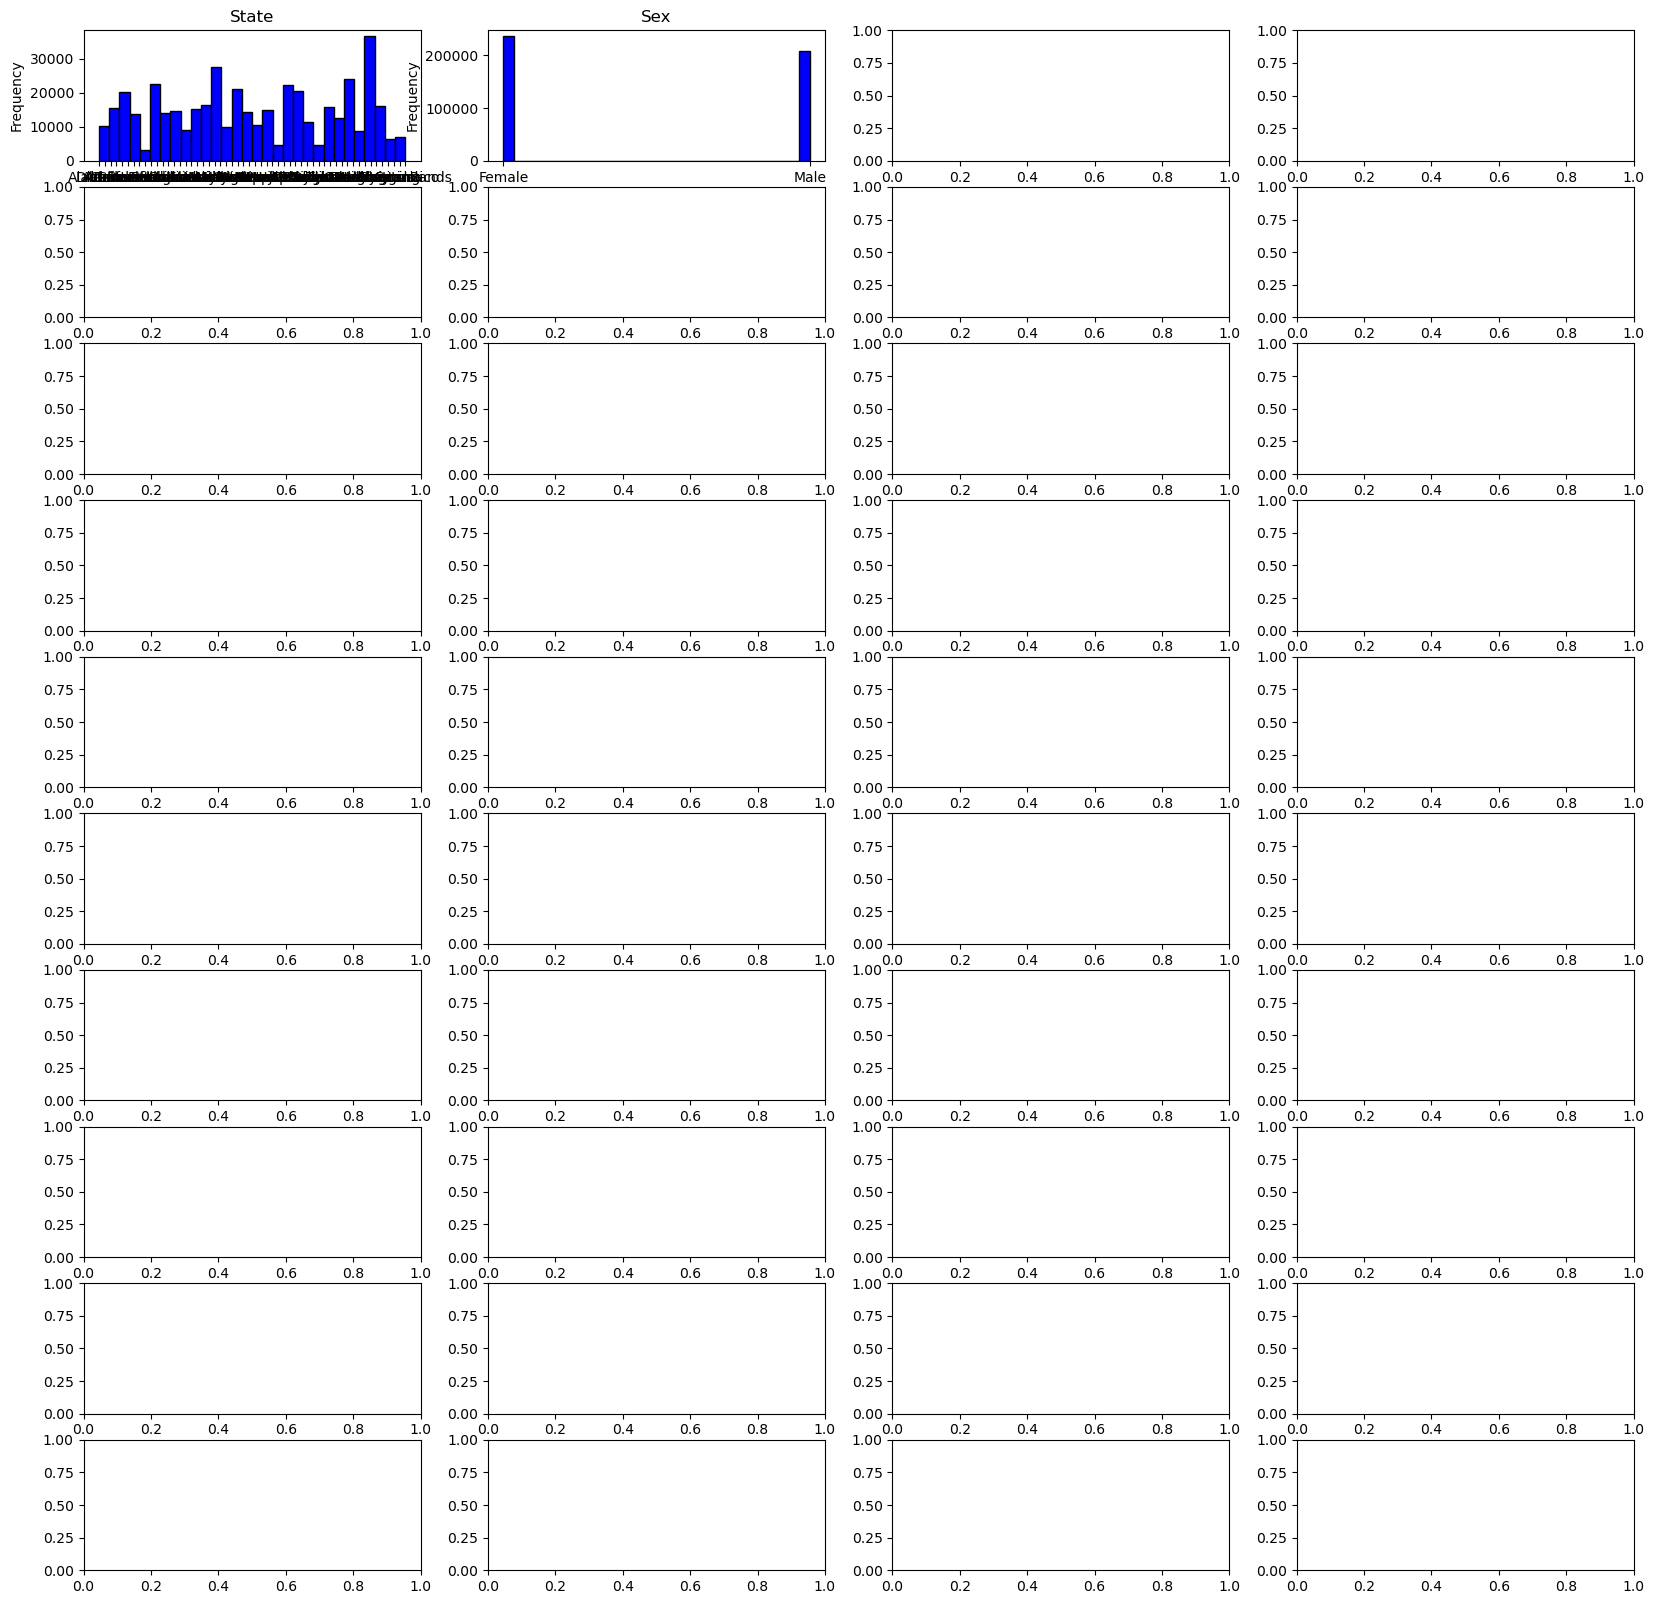

In [31]:
print("Histogram Column Analysis")

# Setting the subplot layouts
plt.subplots(10, 4, figsize=(20, 20))

# Plotting histograms
for i, column in enumerate(heart_attack_raw_copy_plot.columns, 1):
    plt.subplot(10, 4, i)
    plt.hist((heart_attack_raw_copy_plot[column]), bins= 30, color='blue', edgecolor="k")
    plt.title(column)
    plt.ylabel("Frequency")
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

Changing the changed columns datatypes back to their originals

In [32]:
heart_attack_raw_copy_plot = heart_attack_raw_copy_plot.astype({"PhysicalHealthDays": float,
                                                                "MentalHealthDays": float,
                                                                "SleepHours": float, 
                                                                "HeightInMeters": float,
                                                                "WeightInKilograms": float, 
                                                                "BMI": float})

Boxplot Numerical Column Analysis


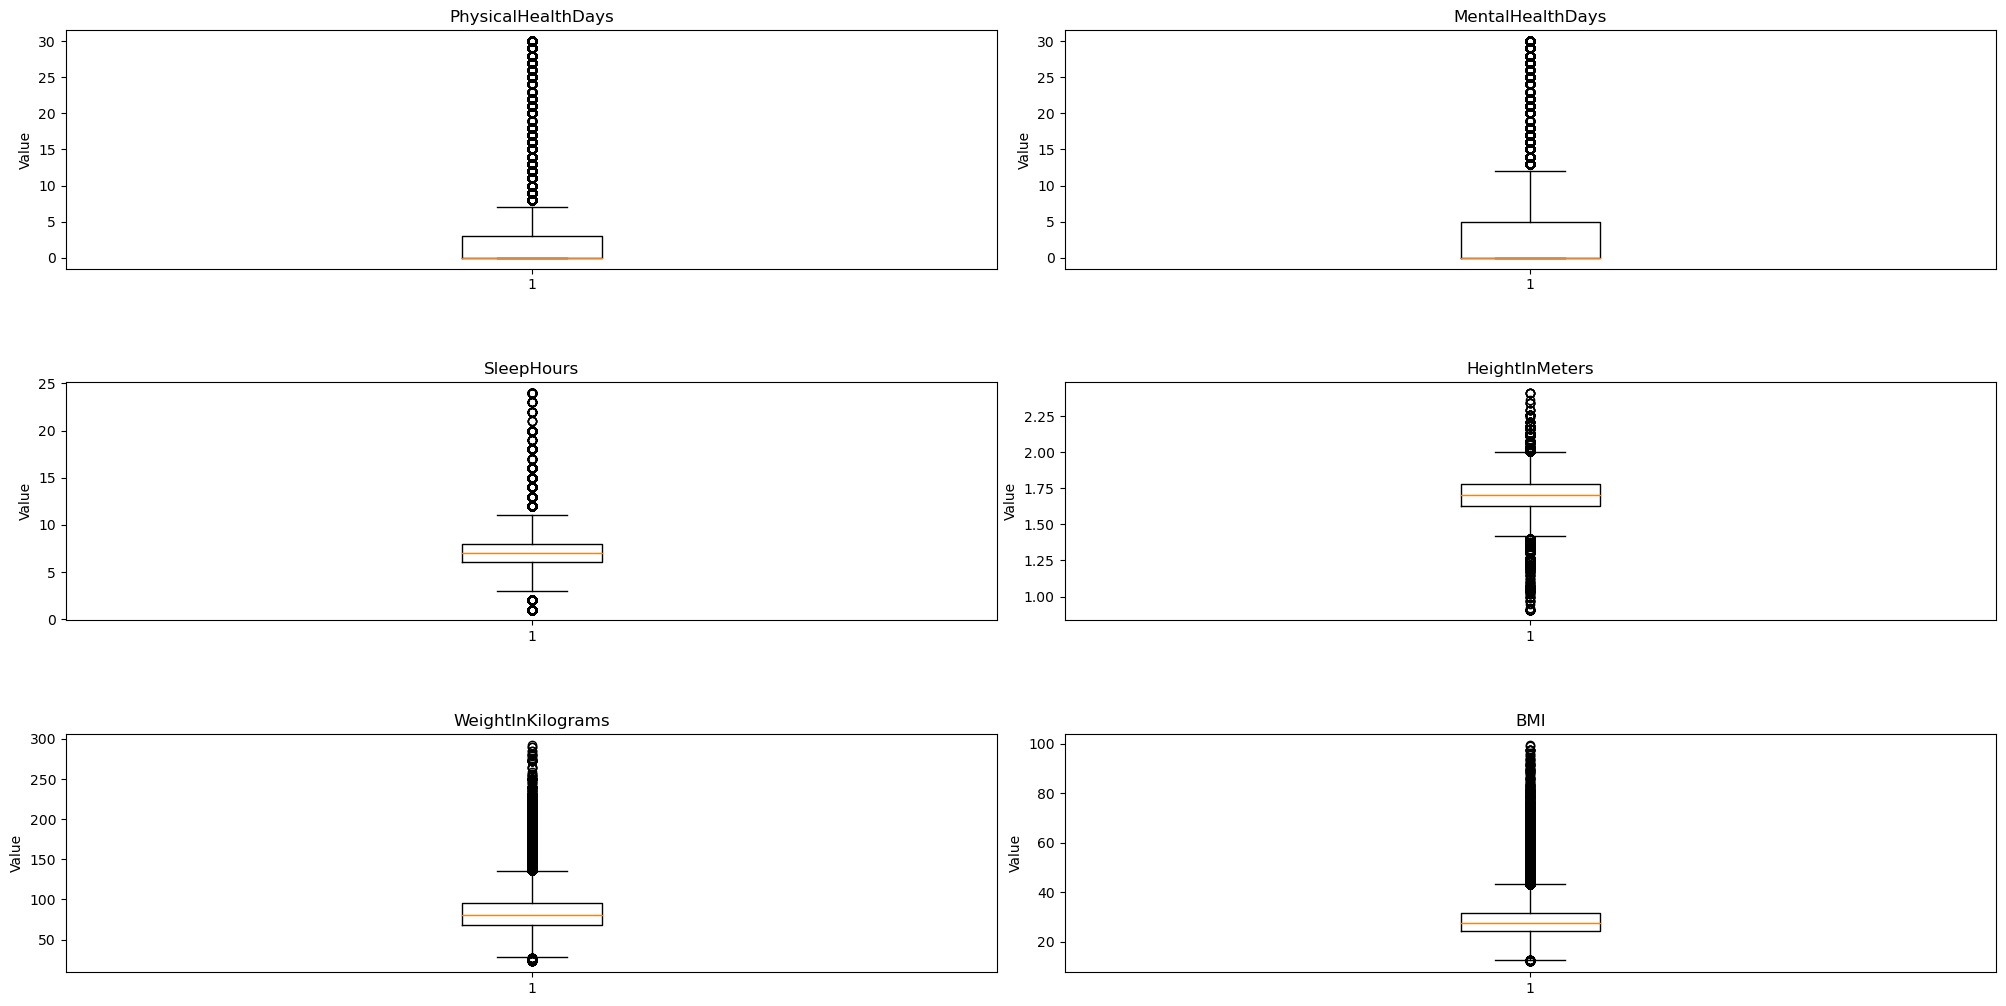

In [33]:
print("Boxplot Numerical Column Analysis")

# Setting the subplot layouts
plt.subplots(3, 2, figsize=(20, 10))

# Obtaining only numeric columns
numeric_columns = heart_attack_raw_copy_plot.select_dtypes(include=['number']).columns

# Plotting histograms
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    plt.boxplot(heart_attack_raw_copy_plot[column].dropna())
    plt.title(column)
    plt.ylabel("Value")
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

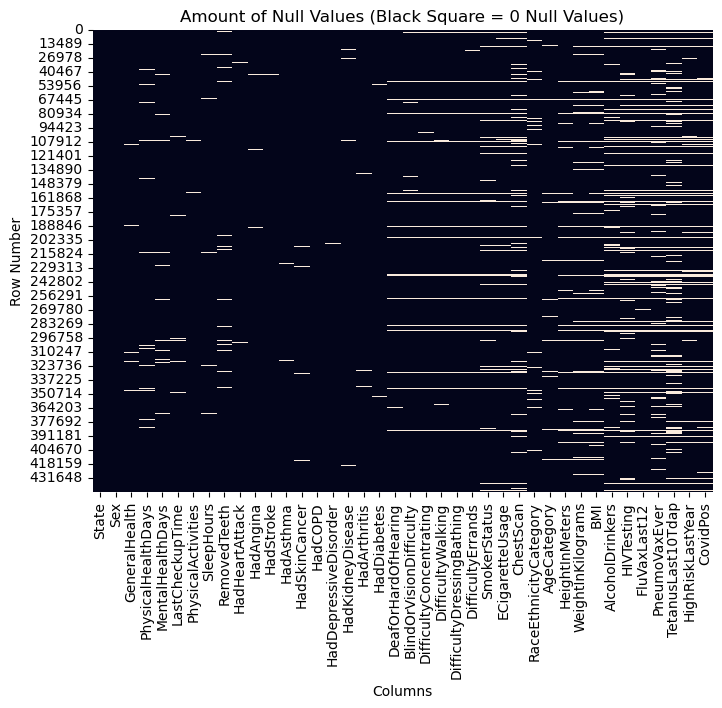

In [34]:
sns.heatmap(heart_attack_raw_copy_plot.isnull(), cbar=False)
plt.title("Amount of Null Values (Black Square = 0 Null Values)")
plt.ylabel("Row Number")
plt.xlabel("Columns")
plt.show

**Dealing with Duplictes and Null Values**

Duplicates:

Through dataframe analysis, the ammount of rows that are duplicates count to 157. 

This is 0.04% of the total dataset, which is an insignificant amount. 

I will proceed in dropping the rows as doing so will NOT affect the overall quality of the data.

In [35]:
heart_attack_clean = heart_attack_raw_copy_plot.drop_duplicates()

In [36]:
heart_attack_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

In [37]:
heart_attack_clean.duplicated().sum()

0

Null Values:

There were 902665 null cells.

With a range of null cells in each column from < 5% - 18.54% of null values in a column.

This is % of the total dataset, which is

I will proceed to drop the rows, as the dataset is so big at 445132 rows and 40 columns, dropping the rows will still give a substantial dataset that can be used further.

In [40]:
heart_attack_clean = heart_attack_raw_copy_plot.dropna(inplace=False)

In [41]:
heart_attack_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24602

In [42]:
heart_attack_clean.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

<function matplotlib.pyplot.show(close=None, block=None)>

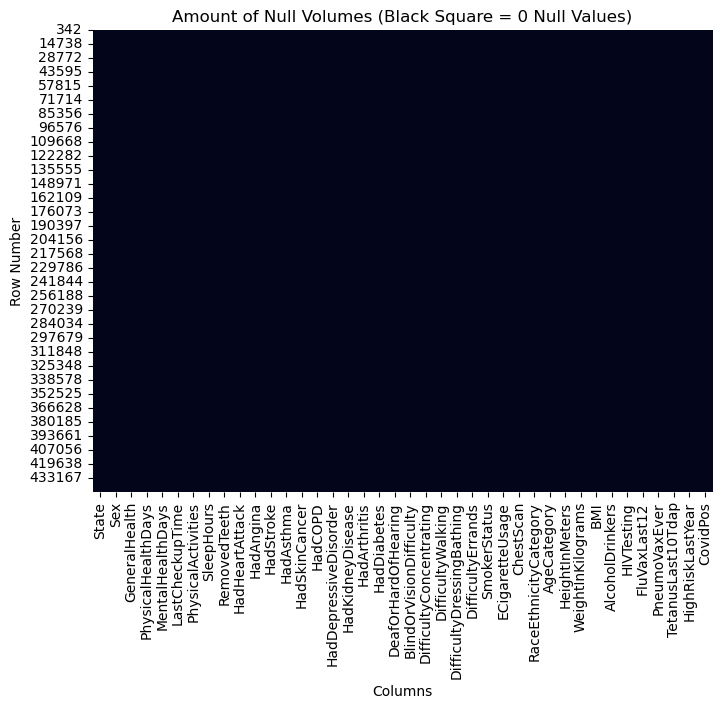

In [43]:
sns.heatmap(heart_attack_clean.isnull(), cbar=False)
plt.title("Amount of Null Volumes (Black Square = 0 Null Values)")
plt.ylabel("Row Number")
plt.xlabel("Columns")
plt.show

---

**Saving the Clean Data**

In [44]:
print("\033[1mSaving the Cleaned Dataframe:\033[0m\n")

try:
    heart_attack_clean.to_csv('heart_attack_clean.csv')
    print("Data saved successfully.")
except:
    print("ERROR: The data has NOT been saved.")

Saving the Cleaned Dataframe:

Data saved successfully.


---

**Correlation Matrix**

Raw Data Correlation Matrix

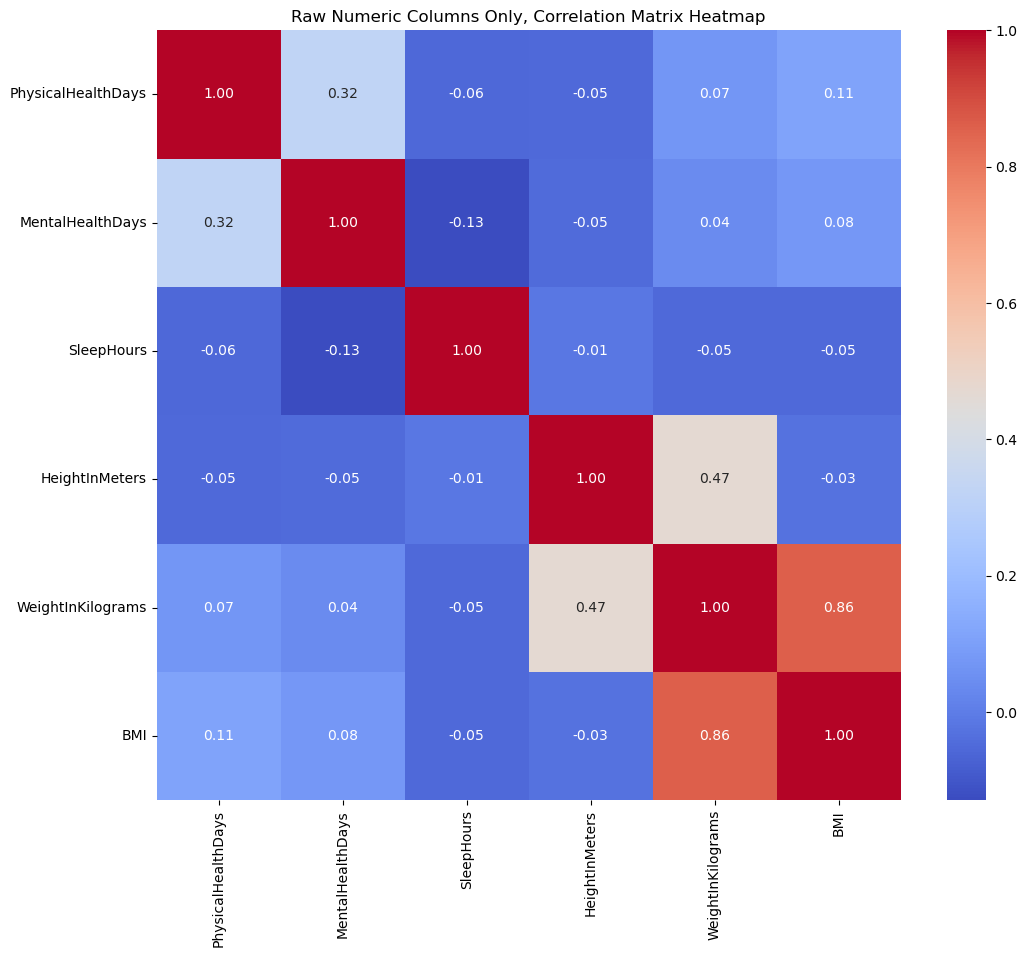

In [45]:
# Select only numerical columns
numeric_columns = heart_attack_raw_copy_plot.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Raw Numeric Columns Only, Correlation Matrix Heatmap')
plt.show()

Clean Data Correlation Matrix

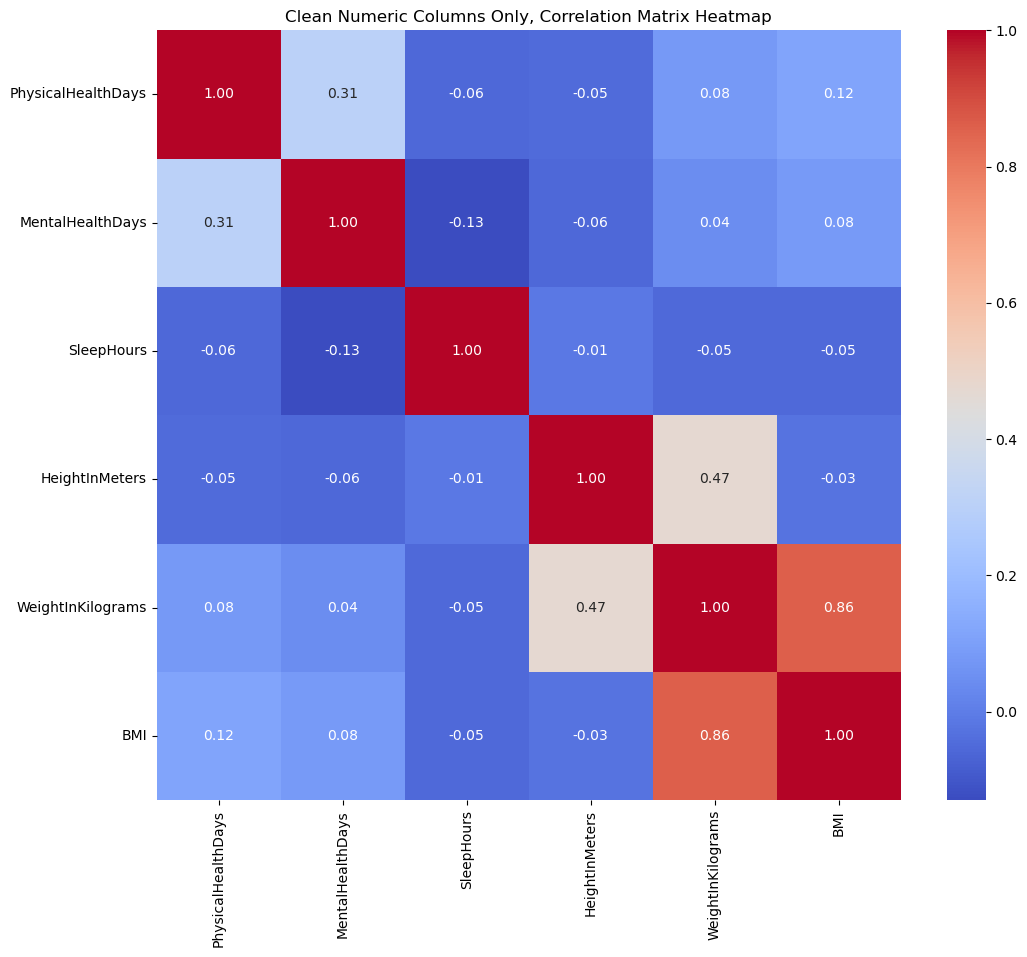

In [46]:
# Select only numerical columns
numeric_columns = heart_attack_clean.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Clean Numeric Columns Only, Correlation Matrix Heatmap')
plt.show()

**Numeric Only Correlation Matrix - Comments**

Within the numerical columns only, the heatmap shows there is a correlation between:

- BMI and WeightinKilograms
- WeightinKilograms and HeightinMeters
- MentalHealthDays and PhysicalHealthDays

---